### IMPORTING LIBRARIES

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression


In [23]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(data_url, sep=';')

In [24]:
display(data.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [26]:
display(data.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [27]:
quality_counts = data['quality'].value_counts().sort_index()
print("Wine Quality Distribution: \n", quality_counts)

Wine Quality Distribution: 
 quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


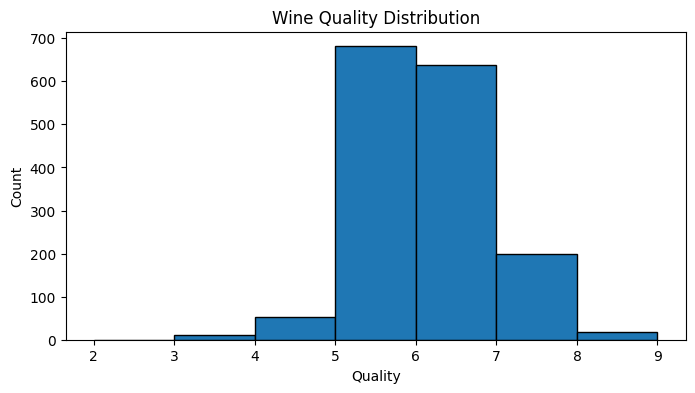

In [28]:
plt.figure(figsize=(8,4))
data['quality'].hist(bins=range(2,10), edgecolor='black')
plt.title('Wine Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.grid(False)
plt.show()

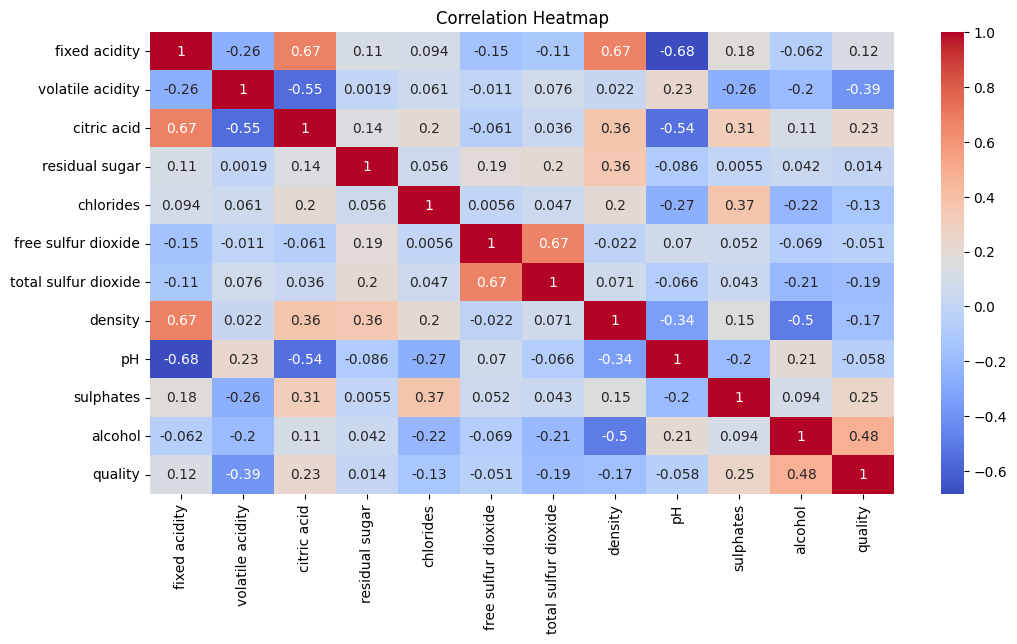

In [29]:
plt.figure(figsize=(12, 6))
corr_matrix=data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [30]:
data.corr()['quality'].sort_values(ascending=False) 

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

* Alcohol has the largest positive correlation to quality whereas volatile acidity has the largest negative correlation

In [31]:
important_features = ['alcohol', 'volatile acidity', 'sulphates']


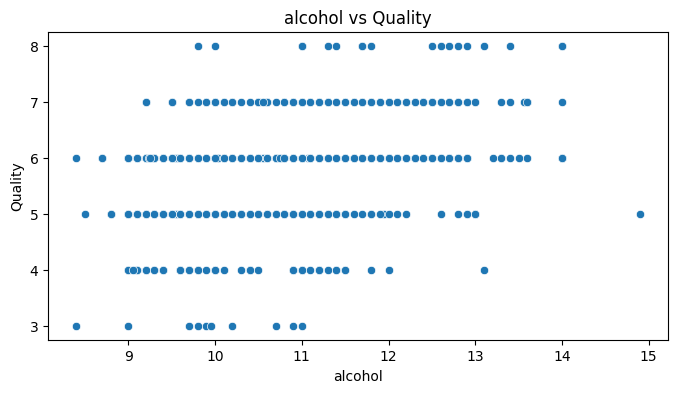

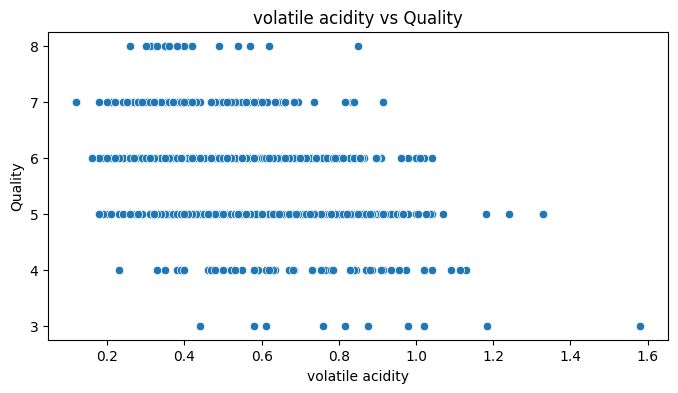

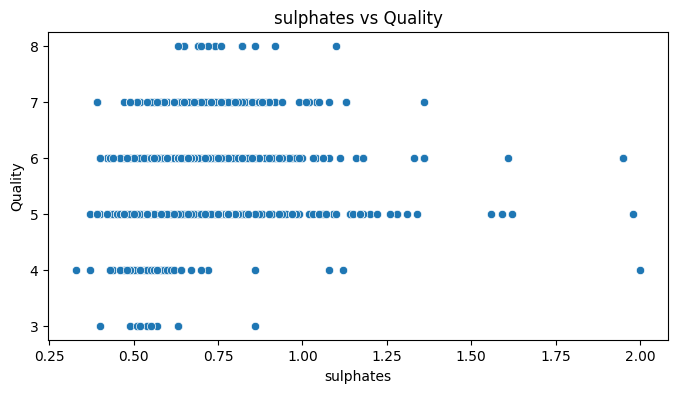

In [32]:
for feature in important_features:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=data[feature], y=data['quality'])
    plt.title(f'{feature} vs Quality')
    plt.xlabel(feature)
    plt.ylabel("Quality")

* comparing the selected features to the target variable

In [33]:
missing = data.isna().sum()
print(missing)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [34]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

* Creating a pipeline to perform scaling and imputing on the data
* Imputing means we can fill missing values in the dataset with carefully chosen values such as the mean or the median of the variable
* Scaling refers to "manipulating" the data so that the mean is 0 and the standard deviation or variance is 1

In [35]:
data.shape

(1599, 12)

In [36]:
X=data.drop(columns='quality')
y=data['quality']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_train.shape

(1279, 11)

In [39]:
y_train.shape

(1279,)

In [40]:
X_train_prepared = num_pipeline.fit_transform(X_train)

In [41]:
X_train_prepared_df = pd.DataFrame(X_train_prepared, columns=X_train.columns)

In [42]:
display(X_train_prepared_df.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.218332,0.889712,0.192092,0.309726,-0.049642,0.691007,1.042934,1.846696,1.093500,0.458223,1.123177
1,-1.290166,-1.788783,0.652753,-0.805080,-0.455214,2.388473,3.593870,-3.004491,-0.400439,-0.401197,1.408272
2,1.494753,-0.784347,1.011045,-0.526378,0.599272,-0.957960,-0.991742,0.768655,-0.075669,0.515517,-0.587390
3,0.276351,0.861811,-0.063831,-0.665729,-0.009085,0.012020,-0.718427,0.089488,0.054238,-1.088733,-0.967516
4,0.044274,2.814880,-0.626861,2.399985,-0.313264,-0.472970,0.222990,1.199871,0.379008,-0.974144,-0.492358


In [ ]:
lin_reg = LinearRegression()

In [47]:
lin_reg.fit(X_train_prepared_df, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [72]:
# y_train_pred_lin = lin_reg.predict(X_train_prepared)
# mse_lin = mean_squared_error(y_train, y_train_pred_lin)

X_test_prepared = num_pipeline.fit_transform(X_test)

y_pred_lin = lin_reg.predict(X_test_prepared)
mse_lin = mean_squared_error(y_test, y_pred_lin)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [80]:
print(f"Linear Regression MSE:  {mse_lin:.4f}")

Linear Regression MSE:  0.3908


In [74]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_prepared_df, y_train)
y_pred_tree = tree_reg.predict(X_test_prepared)
mse_tree = mean_squared_error(y_test, y_pred_tree)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [81]:
print(f"Decision Tree MSE:  {mse_tree:.4f}")

Decision Tree MSE:  0.7312


In [82]:
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train_prepared_df, y_train)
y_pred_forest = forest_reg.predict(X_test_prepared)
mse_forest = mean_squared_error(y_test, y_pred_forest)   
print(f"Random Forest MSE:  {mse_forest:.4f}")

Random Forest MSE:  0.3279


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [55]:
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], "r--")
    plt.xlabel("Actual Quality")
    plt.ylabel("Predicted Quality")
    plt.title(title)
    plt.grid(True)
    plt.show()


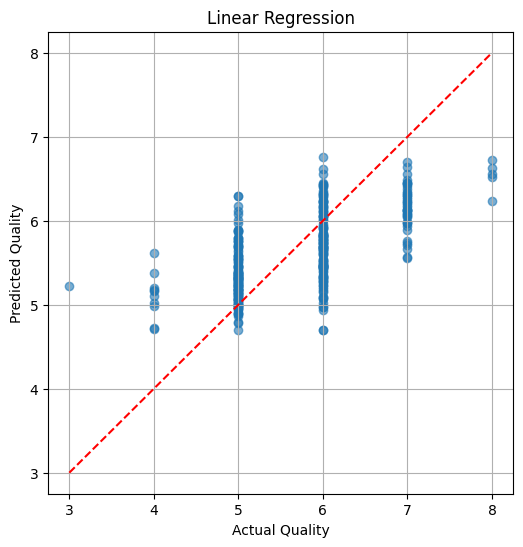

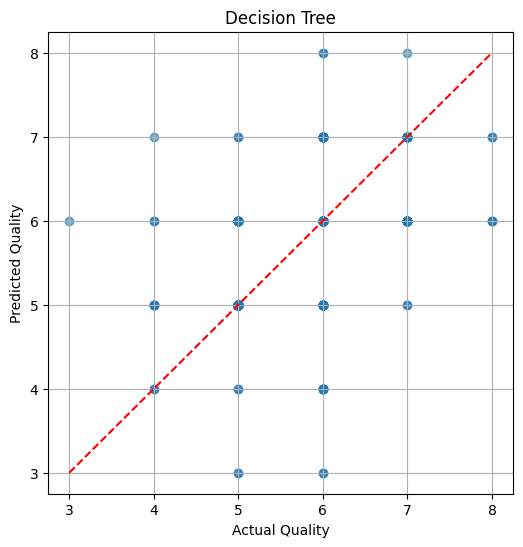

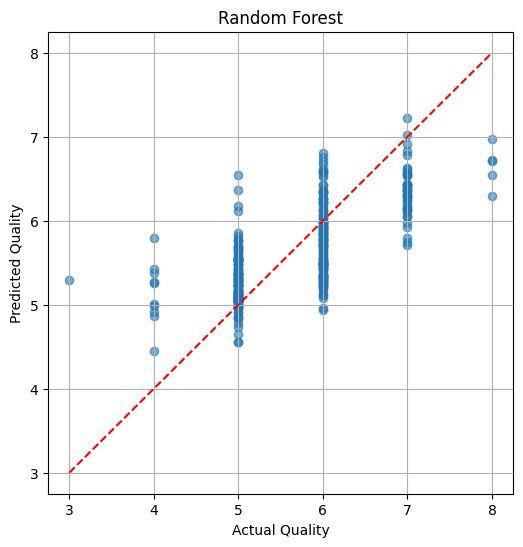

In [79]:
plot_predictions(y_test, y_pred_lin, "Linear Regression")
plot_predictions(y_test, y_pred_tree, "Decision Tree")
plot_predictions(y_test, y_pred_forest, "Random Forest")

In [57]:
# Cross Validation 

def display_scores(model, X, y, cv=10):
    scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=cv)
    rmse_scores = np.sqrt(-scores)
    print(f"Cross Validation RMSE: {rmse_scores.mean():.4f} ± {rmse_scores.std():.4f}")
    

* The purpose of CV is to choose the best train-test split for the data
* The number of folds refers to the number of parts that we split the data (e.g., 80% train and 20% test means 5 parts)

In [58]:
display_scores(lin_reg, X_train_prepared, y_train)
display_scores(tree_reg, X_train_prepared, y_train)
display_scores(forest_reg, X_train_prepared, y_train)

Cross Validation RMSE: 0.6579 ± 0.0592
Cross Validation RMSE: 0.7776 ± 0.0778
Cross Validation RMSE: 0.5954 ± 0.0605


In [59]:
param_grid = [
    {'n_estimators': [10, 30, 100],
     'max_features': [4, 6, 8] 
     }, 
     {'bootstrap': [False],
     'n_estimators': [10, 30],
     'max_features': [4, 6]  
     }
]

* The parameters we need for hyperparameter tuning are the ones that we provide to the model and are not learned during training

In [60]:
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                            scoring='neg_mean_squared_error', 
                            return_train_score=True,
                            n_jobs=-1, verbose=2)
grid_search.fit(X_train_prepared, y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV] END ....................max_features=4, n_estimators=10; total time=   0.0s
[CV] END ....................max_features=4, n_estimators=10; total time=   0.0s
[CV] END ....................max_features=4, n_estimators=10; total time=   0.0s
[CV] END ....................max_features=4, n_estimators=10; total time=   0.0s
[CV] END ....................max_features=4, n_estimators=10; total time=   0.0s
[CV] END ....................max_features=4, n_estimators=30; total time=   0.1s
[CV] END ....................max_features=4, n_estimators=30; total time=   0.1s
[CV] END ....................max_features=4, n_estimators=30; total time=   0.1s
[CV] END ....................max_features=4, n_estimators=30; total time=   0.1s
[CV] END ....................max_features=4, n_estimators=30; total time=   0.1s
[CV] END ....................max_features=6, n_estimators=10; total time=   0.0s
[CV] END ....................max_features=6, n_e

,estimator,RandomForestR...ndom_state=42)
,param_grid,"[{'max_features': [4, 6, ...], 'n_estimators': [10, 30, ...]}, {'bootstrap': [False], 'max_features': [4, 6], 'n_estimators': [10, 30]}]"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,100


* Grid Search builds a model for every possible combination of the hyperparameters 
* Grid Search is computationally expensive as more combinations means more models that must be built
* Alternative to Grid Search is Randomized Search which randomly selects combinations of hyperparameters and builds a specified number of models
* Randomized Search is less computationally expensive because it does not build all possible models

In [62]:
print("Best Parameters: ", grid_search.best_params_)
final_model = grid_search.best_estimator_

Best Parameters:  {'max_features': 8, 'n_estimators': 100}


In [64]:
X_test_prepared = num_pipeline.transform(X_test)
y_test_pred = final_model.predict(X_test_prepared)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE (Final Model): {mse_test:.4f}")

Test MSE (Final Model): 0.3112


In [69]:
import pickle
with open('wine_model.pkl', 'wb') as f:
    pickle.dump(lin_reg, f)

In [66]:
importances = final_model.feature_importances_
feature_names = list(X_train.columns)
feat_imp = sorted(zip(importances, feature_names), reverse=True)

In [68]:
importance_df = pd.DataFrame(feat_imp, columns= ["Importance", "Feature"])